## Exercise 2: One dimensional motion
Write a program to solve the 1d equations of motion for a falling
object. Input values: $y_0=y(t=0)$; $v_0=v(t=0)$. Compare results with
different $\Delta t$ and the exact solution. Plot $y(t)$ and $v(t)$. Use
$y_0=10m$; $v_0=0$.

In [79]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt


In [80]:
import numpy as np
import matplotlib.pyplot as plt

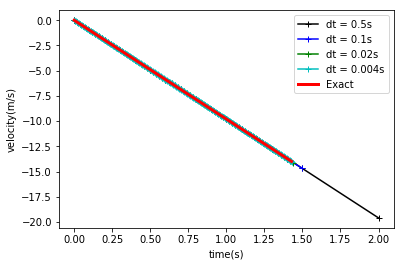

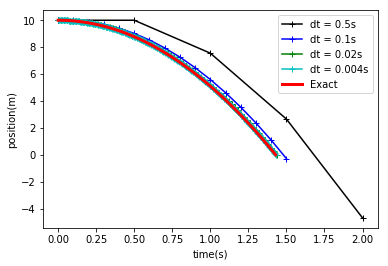

In [81]:

g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 10.           # initial position
v0 = 0.            # initial velocity
#vt = 30.          # terminal velocity

dt = 0.5           # time step

gforce = g*mass    # weight

label_list = ('dt = 0.5s','dt = 0.1s', 'dt = 0.02s', 'dt = 0.004s')
color_list = ('k','b','g','c')


for j in range(4):
    p = particle(mass, y0, v0)

    y = [y0]
    v = [v0]
    t = [0.]

    while p.y > 0.:
        fy = -gforce
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)
    
    t_data = np.array(t)
    y_data = np.array(y)
    v_data = np.array(v)
    
    #print(v_data)
    #print(y_data)
    #print('\n')
    
    plt.figure(1)
    plt.plot(t_data, v_data,'-+', color=color_list[j], label=label_list[j])
    plt.xlabel('time(s)')
    plt.ylabel('velocity(m/s)')
    plt.legend()
    
    plt.figure(2)
    plt.plot(t_data, y_data,'-+', color=color_list[j], label=label_list[j])
    plt.xlabel('time(s)')
    plt.ylabel('position(m)')
    plt.legend()
    
    dt = dt/5.

## Plot exact solution

t_f = np.sqrt(2*y0/g)
t_range = np.linspace(0,t_f,100)
v_theory = v0-g*t_range
y_theory = y0-g*t_range**2/2

plt.figure(1)
plt.plot(t_range,v_theory,'r',lw=3,label='Exact')
plt.legend()

plt.figure(2)
plt.plot(t_range,y_theory,'r',lw=3,label='Exact')
plt.legend()


## Exercise 3: Air resistance 
1.  Sometimes, the force $F_d$ can vary with the square of the velocity
    $$F_d=k_2 v^2.$$ Derive the net force on a falling object using this
    expression, in units of the terminal velocity $v_t$
    
    $$F_d = mg(\frac{v}{v_t})^2$$
    $F_d$ is in direction of $-v$
    $$F_{net}=-mg(1+v\frac{|v|}{v_t^2})$$
    
2.  Compute the speed at which a pebble of mass $m=10^{-2}kg$ reaches
    the ground if it’s dropped from rest at $y_0=50m$. Compare this
    speed to that of a freely falling object under the same conditions.
    Assume that the drag force is proportional to $v^2$ and the terminal
    speed is $v_t=30m/s$



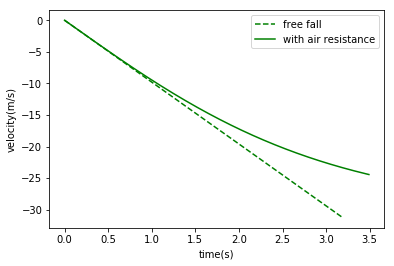

In [82]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 50.           # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
k2 = g*mass/vt**2  # drag coeff.

dt = 0.001         # time step

gforce = g*mass    # weight

##---------Free fall--------------------------
p1 = particle(mass, y0, v0)

y1 = [y0]
v1 = [v0]
t1 = [0.]

while p1.y > 0.:
    fy = -gforce
    p1.euler(fy, dt)
    y1.append(p1.y)
    v1.append(p1.v)
    t1.append(t1[-1]+dt)
    
t1_data = np.array(t1)
y1_data = np.array(y1)
v1_data = np.array(v1)

plt.figure(3)
plt.plot(t1_data, v1_data,'g--',label='free fall')
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.legend()

##---------With air resistance----------------
p2 = particle(mass, y0, v0)

y2 = [y0]
v2 = [v0]
t2 = [0.]

while p2.y > 0.:
    fy = -gforce-k2*p2.v*abs(p2.v)
    p2.euler(fy, dt)
    y2.append(p2.y)
    v2.append(p2.v)
    t2.append(t2[-1]+dt)
    
t2_data = np.array(t2)
y2_data = np.array(y2)
v2_data = np.array(v2)

plt.figure(3)
plt.plot(t2_data, v2_data,'green',label='with air resistance')
plt.legend()

3.  Suppose that an object is thrown vertically upward with initial
    velocity $v_0$. If we neglect air resistance, we know that the
    maximum height reached by the object is $v_0^2/2g$, and its velocity
    upon return to the earth equals $v_0$, the time of ascent equals the
    time of descent, and the total time in the air is $v_0/g$. Before
    performing a numerical simulation, give a simple qualitative
    analysis of the problem when it is affected by the resistance of
    the air. Then, perform, the numerical calculation assuming
    $F_d \sim v^2$ with a terminal speed $v_t=30m/s$. Suggestions:
    Choose $v>0$ when it’s pointing upward, and $v<0$ when it’s pointing
    toward the earth.

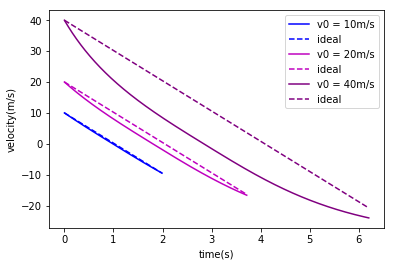

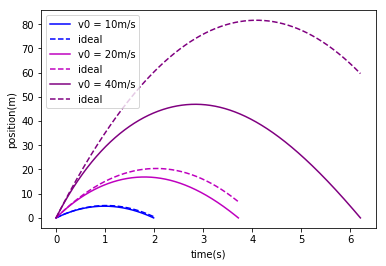

In [121]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 0.            # initial position
v0 = 10.           # initial velocity
vt = 30.           # terminal velocity
k2 = g*mass/vt**2  # drag coeff.

dt = 0.001         # time step

gforce = g*mass    # weight

label_list = ('v0 = 10m/s','v0 = 20m/s', 'v0 = 40m/s')
color_list = ('b','m','purple')

for j in range(3):
    p3 = particle(mass, y0, v0)

    y3 = [y0]
    v3 = [v0]
    t3 = [0.]

    while p3.y >= 0. :
        fy = -gforce-k2*p3.v*abs(p3.v)
        p3.euler(fy, dt)
        y3.append(p3.y)
        v3.append(p3.v)
        t3.append(t3[-1]+dt)
    
    t3_data = np.array(t3)
    y3_data = np.array(y3)
    v3_data = np.array(v3)

    #print(v_data)
    #print(y_data)

    plt.figure(4)
    plt.plot(t3_data, v3_data, color=color_list[j], label=label_list[j])
    plt.plot(t3_data, v0-g*t3_data, '--', color=color_list[j], label='ideal')
    plt.xlabel('time(s)')
    plt.ylabel('velocity(m/s)')
    plt.legend()
    
    plt.figure(5)
    plt.plot(t3_data, y3_data, color=color_list[j], label=label_list[j])
    plt.plot(t3_data, v0*t3_data-g*t3_data**2/2, '--', color=color_list[j], label='ideal')
    plt.xlabel('time(s)')
    plt.ylabel('position(m)')
    plt.legend()
    
    v0 = v0*2

## Exercise 4: Gravitational force 
According to Newton’s law of gravitation, the action of the
gravitational field of the earth on a particle is given by
$$F=\frac{GMm}{(R+y)^2}=\frac{gm}{(1+y/R)^2},$$ where $y$ is measured
from the earth’s surface, $R$ is the earth’s radius, $G$ is the
gravitational constant, $M$ is the mass of the earth, and $g=GM/R^2$.
There is not simple analytical solution for this problem. Modify your
code to simulate the fall of a particle from an altitude $y_0$ with zero
initial velocity, and compute its speed when it hits the ground.
Determine the value of $y_0$ for which this impact velocity differs by
one percent from its value under a constant acceleration $g=9.8m/s^2$.
Take the radius of the earth to be $6.37\times 10^6m$.

## Challenge 2.3:

Modify the previous code to introduce the gravitational force that depends on the position, and solve Exercise 4

Initial position 129309.09m, final speeds differ by 1.0000% 
Initial position 129321.21m, final speeds differ by 1.0001% 
Initial position 129331.31m, final speeds differ by 1.0000% 
Initial position 129333.33m, final speeds differ by 1.0001% 
Initial position 129335.35m, final speeds differ by 1.0001% 
Initial position 129339.39m, final speeds differ by 1.0003% 
Initial position 129341.41m, final speeds differ by 1.0000% 
Initial position 129343.43m, final speeds differ by 1.0001% 
Initial position 129345.45m, final speeds differ by 1.0001% 
Initial position 129347.47m, final speeds differ by 1.0002% 
Initial position 129351.52m, final speeds differ by 1.0003% 
Initial position 129353.54m, final speeds differ by 1.0000% 
Initial position 129355.56m, final speeds differ by 1.0001% 
Initial position 129357.58m, final speeds differ by 1.0001% 
Initial position 129359.60m, final speeds differ by 1.0002% 
Initial position 129361.62m, final speeds differ by 1.0002% 
Initial position 129363.

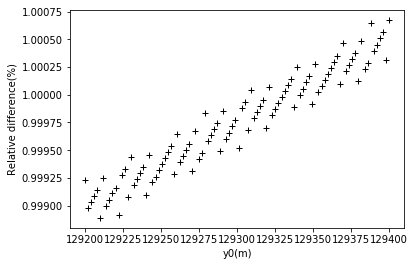

In [119]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
R = 6.37e6         # Radius of the earth (m)

v0 = 0.            # initial velocity
dt = 0.0005         # time step

gforce = g*mass    # weight

y0_range = np.linspace(1.292e5,1.294e5,100)  # Range determined by several trials

for y0 in y0_range:

    p4 = particle(mass, y0, v0)            # Gravitational force
    y4 = [y0]
    v4 = [v0]
    t4 = [0.]

    while p4.y > 0.:
        fy = -gforce / (1 + p4.y/R)**2
        p4.euler(fy, dt)
        y4.append(p4.y)
        v4.append(p4.v)
        t4.append(t4[-1]+dt)
    
    t4_data = np.array(t4)
    y4_data = np.array(y4)
    v4_data = np.array(v4)
    
    p5 = particle(mass, y0, v0)           # Constant acceleration
    y5 = [y0]
    v5 = [v0]
    t5 = [0.]

    while p5.y > 0.:
        fy = -gforce
        p5.euler(fy, dt)
        y5.append(p5.y)
        v5.append(p5.v)
        t5.append(t5[-1]+dt)
    
    t5_data = np.array(t5)
    y5_data = np.array(y5)
    v5_data = np.array(v5)
    
    percent = (v5[-1]-v4[-1])/v5[-1]*100

    plt.figure(6)
    plt.plot(y0, percent,'k+')
    plt.xlabel('y0(m)')
    plt.ylabel('Relative difference(%)')
    
    if percent > 1. :
        print('Initial position {:.2f}m, final speeds differ by {:.4%} '.format(y0,percent/100))
        #break

## Exercise 6: Trajectory of a shot 

Modify your code so that the 2d trajectory of an object can be computed,
and graphs of $y$ as a function of $x$ can be made.

1.  As a check on your program, first neglect the effect of air
    resistance so that you an compare to known results. Supouse that the
    object is thrown and $t_0$ with an angle $\theta _0$ with an initial
    velocity $v_0=15$m/s. Vary $\theta_0$ and show that the maximum
    range occurs at $\theta_0=45^{\circ}$ Compare your result with the
    exact value $v_0^2/g$

2.  Consider the effects of air resistance. Compute the maximum range,
    and the corresponding angle using $k/m=0.1$, $v_0=30$m/s.
    
## Challenge 2.4: 

Modify the previous code to include the effect of drag resistance, and solve Exercise 6, part 2.

In [122]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

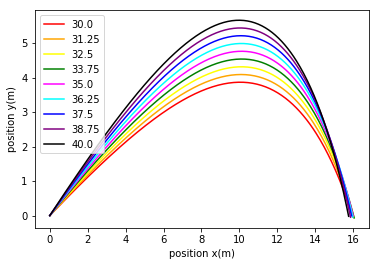

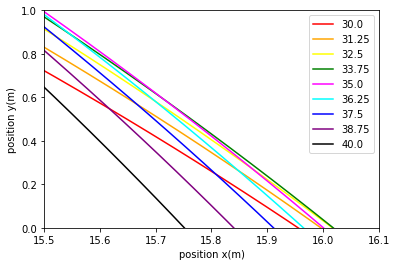

In [137]:
g = 9.8            # g acceleration
v0 = 30.           # initial velocity
k = 0.1
m = 1.
dt = 0.01           # time step

color_list = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']
angle_range = np.linspace(30,40,9)           # angle range

for i in range(9):
    x = [0]                             
    y = [0]
    vx = [np.cos(angle_range[i]*np.pi/180.)*v0] 
    vy = [np.sin(angle_range[i]*np.pi/180.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    while p.y >= 0.:
        v = np.sqrt(p.vx**2 + p.vy**2)
        fx = - k/m * v * p.vx
        fy = - g - k/m * v * p.vy
        p.euler(fx, fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) 
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)

    plt.figure(7)
    plt.plot(x_data, y_data, color=color_list[i], ls='-', label = str(angle_range[i]))
    plt.xlabel('position x(m)')
    plt.ylabel('position y(m)')
    plt.legend()

    plt.figure(8)
    plt.plot(x_data, y_data, color=color_list[i], ls='-', label = str(angle_range[i]))
    plt.xlabel('position x(m)')
    plt.ylabel('position y(m)')
    plt.ylim([0,1])
    plt.xlim([15.5,16.1])
    plt.legend()
